# Perceptron Implementation and Training

This notebook implements a perceptron from scratch and demonstrates its training on:
1. A linearly separable dataset
2. The XOR problem (non-linearly separable)
3. A multi-layer perceptron (MLP) that can solve XOR

## 1. Import Libraries and Helper Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

## 2. Perceptron Class Implementation

The perceptron is the simplest form of a neural network. It consists of:
- Input features (x)
- Weights (w)
- Bias (b)
- Activation function (step function)

**Decision Rule**: $y = \text{step}(w \cdot x + b)$

**Update Rule**: 
- $w = w + \eta \cdot (y_{true} - y_{pred}) \cdot x$
- $b = b + \eta \cdot (y_{true} - y_{pred})$

In [2]:
class Perceptron:
    """
    A simple Perceptron classifier implementation.
    
    Parameters:
    learning_rate : float
        The learning rate for weight updates (default: 0.01)
    n_iterations : int
        Number of passes over the training dataset (default: 100)
    random_state : int
        Random seed for weight initialization (default: None)
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=100, random_state=None):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.random_state = random_state
        self.weights = None
        self.bias = None
        self.errors_per_epoch = []  # Track errors for visualization
        
    def _step_function(self, x):
        """Step activation function: returns 1 if x >= 0, else 0"""
        return np.where(x >= 0, 1, 0)
    
    def fit(self, X, y):
        """
        Train the perceptron on the given data.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training data
        y : array-like, shape (n_samples,)
            Target values (0 or 1)
        
        Returns:
        --------
        self : object
        """
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.random.randn(n_features) * 0.01
        self.bias = 0.0
        self.errors_per_epoch = []
        
        # Training loop
        for epoch in range(self.n_iterations):
            errors = 0
            for xi, yi in zip(X, y):
                # Calculate prediction
                linear_output = np.dot(xi, self.weights) + self.bias
                y_pred = self._step_function(linear_output)
                
                # Calculate error and update weights
                error = yi - y_pred
                if error != 0:
                    self.weights += self.learning_rate * error * xi
                    self.bias += self.learning_rate * error
                    errors += 1
            
            self.errors_per_epoch.append(errors)
            
            # Early stopping if no errors
            if errors == 0:
                print(f"Converged at epoch {epoch + 1}")
                break
        
        return self
    
    def predict(self, X):
        """
        Predict class labels for samples in X.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Samples to predict
        
        Returns:
        --------
        array, shape (n_samples,)
            Predicted class labels
        """
        linear_output = np.dot(X, self.weights) + self.bias
        return self._step_function(linear_output)
    
    def accuracy(self, X, y):
        """Calculate classification accuracy."""
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    
    def get_decision_boundary(self):
        """
        Get the decision boundary parameters.
        For 2D: x2 = -(w1*x1 + b) / w2
        """
        return self.weights, self.bias

print("Perceptron class defined successfully!")

Perceptron class defined successfully!


## 3. Visualization Helper Functions

In [3]:
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    """
    Plot the data points and decision boundary for a 2D dataset.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', 
                         edgecolors='black', s=100, alpha=0.8)
    
    # Plot decision boundary
    weights, bias = model.get_decision_boundary()
    
    if weights[1] != 0:  # Avoid division by zero
        x1_range = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
        x2_boundary = -(weights[0] * x1_range + bias) / weights[1]
        ax.plot(x1_range, x2_boundary, 'g-', linewidth=2, 
                label='Decision Boundary')
    
    ax.set_xlabel('Feature 1 (x1)', fontsize=12)
    ax.set_ylabel('Feature 2 (x2)', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.legend()
    plt.colorbar(scatter, label='Class')
    plt.tight_layout()
    plt.show()


def plot_training_errors(errors, title="Training Errors per Epoch"):
    """
    Plot the number of misclassifications per epoch.
    """
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(range(1, len(errors) + 1), errors, marker='o', 
            linestyle='-', color='blue')
    ax.set_xlabel('Epoch', fontsize=12)
    ax.set_ylabel('Number of Errors', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.set_xticks(range(1, len(errors) + 1, max(1, len(errors)//10)))
    plt.tight_layout()
    plt.show()


def plot_dataset(X, y, title="Dataset Visualization"):
    """
    Plot a 2D dataset with class labels.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', 
                         edgecolors='black', s=100)
    ax.set_xlabel('Feature 1 (x1)', fontsize=12)
    ax.set_ylabel('Feature 2 (x2)', fontsize=12)
    ax.set_title(title, fontsize=14)
    plt.colorbar(scatter, label='Class')
    ax.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

print("Visualization functions defined successfully!")

Visualization functions defined successfully!


---
# Dataset 1: Linearly Separable Dataset

A linearly separable dataset is one where a single straight line (hyperplane in higher dimensions) can perfectly separate the two classes.

In [4]:
# Create a linearly separable dataset
n_samples_per_class = 100

# Class 0: clustered around (-2, -2)
X_class0 = np.random.randn(n_samples_per_class, 2) * 0.5 - 2

# Class 1: clustered around (2, 2)
X_class1 = np.random.randn(n_samples_per_class, 2) * 0.5 + 2

# Combine the data
X_linear = np.vstack((X_class0, X_class1))
y_linear = np.concatenate((np.zeros(n_samples_per_class), 
                           np.ones(n_samples_per_class)))

# Shuffle the data
shuffle_idx = np.random.permutation(len(y_linear))
X_linear = X_linear[shuffle_idx]
y_linear = y_linear[shuffle_idx]

print("Linearly Separable Dataset:")
print(f"  - Total samples: {len(y_linear)}")
print(f"  - Class 0 samples: {np.sum(y_linear == 0)}")
print(f"  - Class 1 samples: {np.sum(y_linear == 1)}")
print(f"  - Feature shape: {X_linear.shape}")

Linearly Separable Dataset:
  - Total samples: 200
  - Class 0 samples: 100
  - Class 1 samples: 100
  - Feature shape: (200, 2)


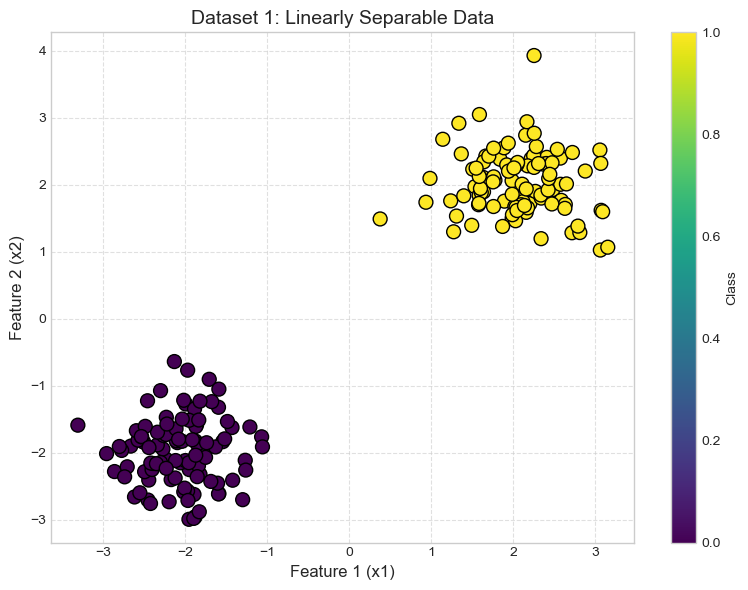

In [5]:
# Visualize the linearly separable dataset
plot_dataset(X_linear, y_linear, title="Dataset 1: Linearly Separable Data")

In [6]:
# Train the perceptron on linearly separable data
perceptron_linear = Perceptron(learning_rate=0.1, n_iterations=100, random_state=42)
perceptron_linear.fit(X_linear, y_linear)

# Evaluate
accuracy_linear = perceptron_linear.accuracy(X_linear, y_linear)
print(f"\nTraining Accuracy: {accuracy_linear * 100:.2f}%")
print(f"Final Weights: {perceptron_linear.weights}")
print(f"Final Bias: {perceptron_linear.bias}")

Converged at epoch 2

Training Accuracy: 100.00%
Final Weights: [0.04290377 0.14739797]
Final Bias: 0.1


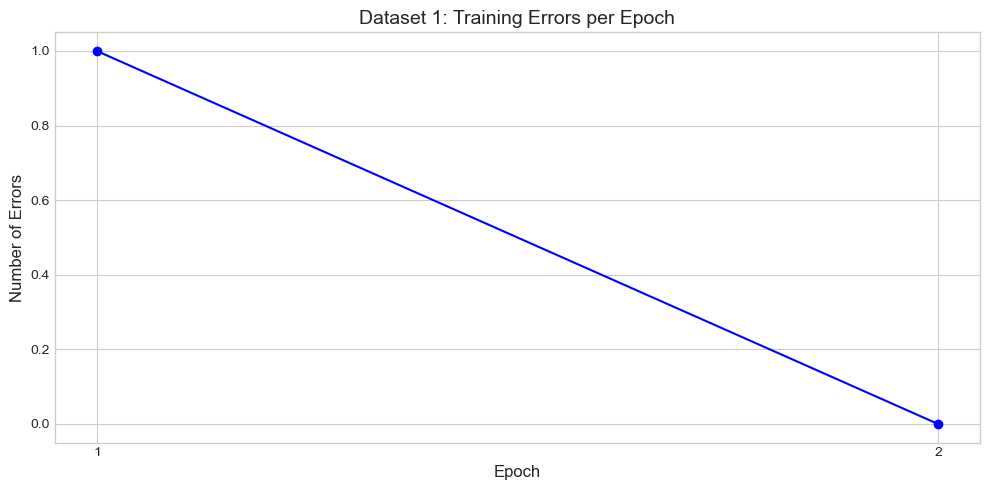

In [7]:
# Plot training errors over epochs
plot_training_errors(perceptron_linear.errors_per_epoch, 
                     title="Dataset 1: Training Errors per Epoch")

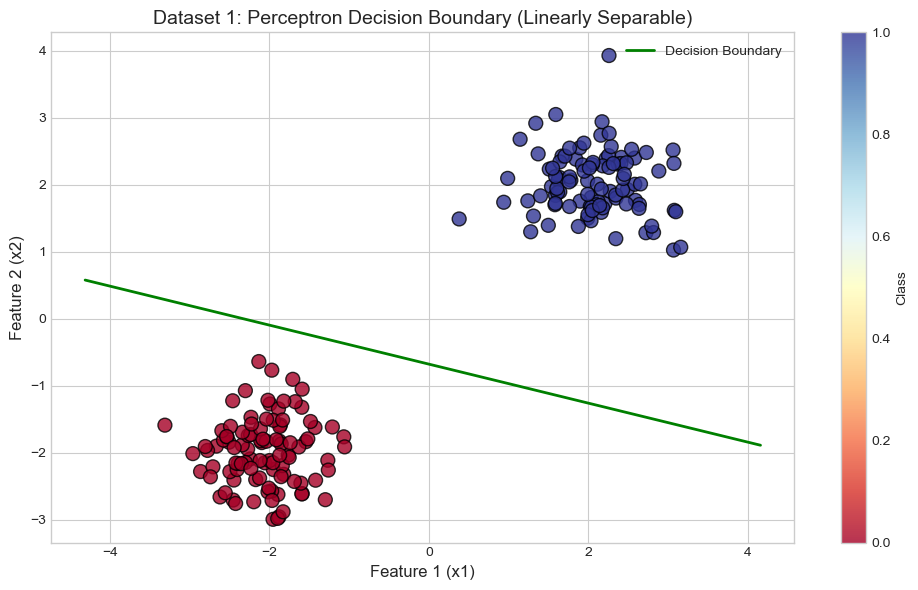

In [8]:
# Visualize the decision boundary
plot_decision_boundary(X_linear, y_linear, perceptron_linear, 
                       title="Dataset 1: Perceptron Decision Boundary (Linearly Separable)")

### Results for Dataset 1 (Linearly Separable)

As expected, the perceptron:
- **Converges** to a solution with 100% accuracy
- Finds a **linear decision boundary** that perfectly separates the two classes
- The number of errors decreases to 0 as training progresses

---
# Dataset 2: XOR Problem

The XOR (exclusive OR) problem is a classic example of a **non-linearly separable** dataset.

XOR Truth Table:
| x1 | x2 | Output |
|----|----|--------|
| 0  | 0  | 0      |
| 0  | 1  | 1      |
| 1  | 0  | 1      |
| 1  | 1  | 0      |

**A single perceptron CANNOT solve the XOR problem** because no single line can separate the classes.

In [9]:
# Create the XOR dataset
X_xor = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_xor = np.array([0, 1, 1, 0])  # XOR outputs

print("XOR Dataset:")
print("x1\tx2\tOutput")
print("-" * 20)
for i in range(len(y_xor)):
    print(f"{X_xor[i, 0]}\t{X_xor[i, 1]}\t{y_xor[i]}")

XOR Dataset:
x1	x2	Output
--------------------
0	0	0
0	1	1
1	0	1
1	1	0


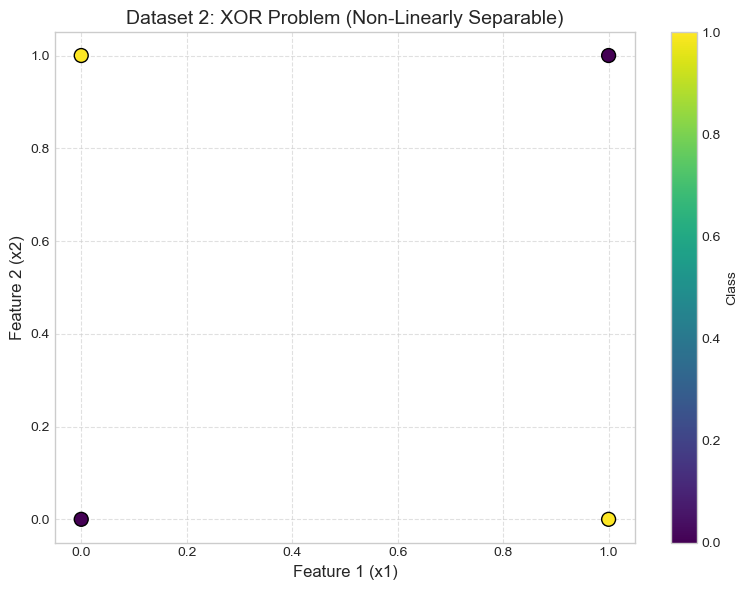

In [10]:
# Visualize the XOR dataset
plot_dataset(X_xor, y_xor, title="Dataset 2: XOR Problem (Non-Linearly Separable)")

In [11]:
# Try to train the perceptron on XOR data
perceptron_xor = Perceptron(learning_rate=0.1, n_iterations=100, random_state=42)
perceptron_xor.fit(X_xor, y_xor)

# Evaluate
accuracy_xor = perceptron_xor.accuracy(X_xor, y_xor)
print(f"\nTraining Accuracy: {accuracy_xor * 100:.2f}%")
print(f"Final Weights: {perceptron_xor.weights}")
print(f"Final Bias: {perceptron_xor.bias}")

# Show predictions
print("\nPredictions vs True Labels:")
predictions = perceptron_xor.predict(X_xor)
for i in range(len(y_xor)):
    print(f"Input: {X_xor[i]}, True: {y_xor[i]}, Predicted: {predictions[i]}, "
          f"{'✓' if predictions[i] == y_xor[i] else '✗'}")


Training Accuracy: 25.00%
Final Weights: [-0.09503286 -0.00138264]
Final Bias: 0.0

Predictions vs True Labels:
Input: [0 0], True: 0, Predicted: 1, ✗
Input: [0 1], True: 1, Predicted: 0, ✗
Input: [1 0], True: 1, Predicted: 0, ✗
Input: [1 1], True: 0, Predicted: 0, ✓


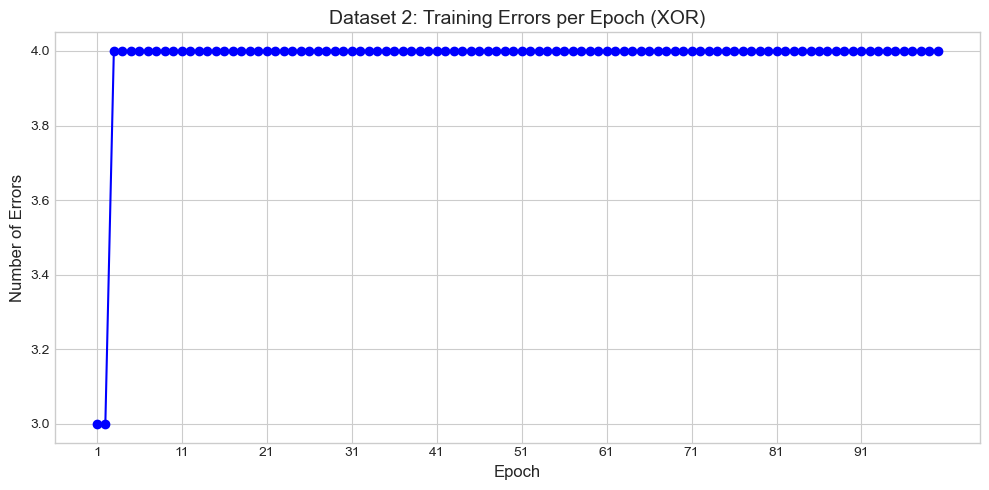

In [12]:
# Plot training errors over epochs for XOR
plot_training_errors(perceptron_xor.errors_per_epoch, 
                     title="Dataset 2: Training Errors per Epoch (XOR)")

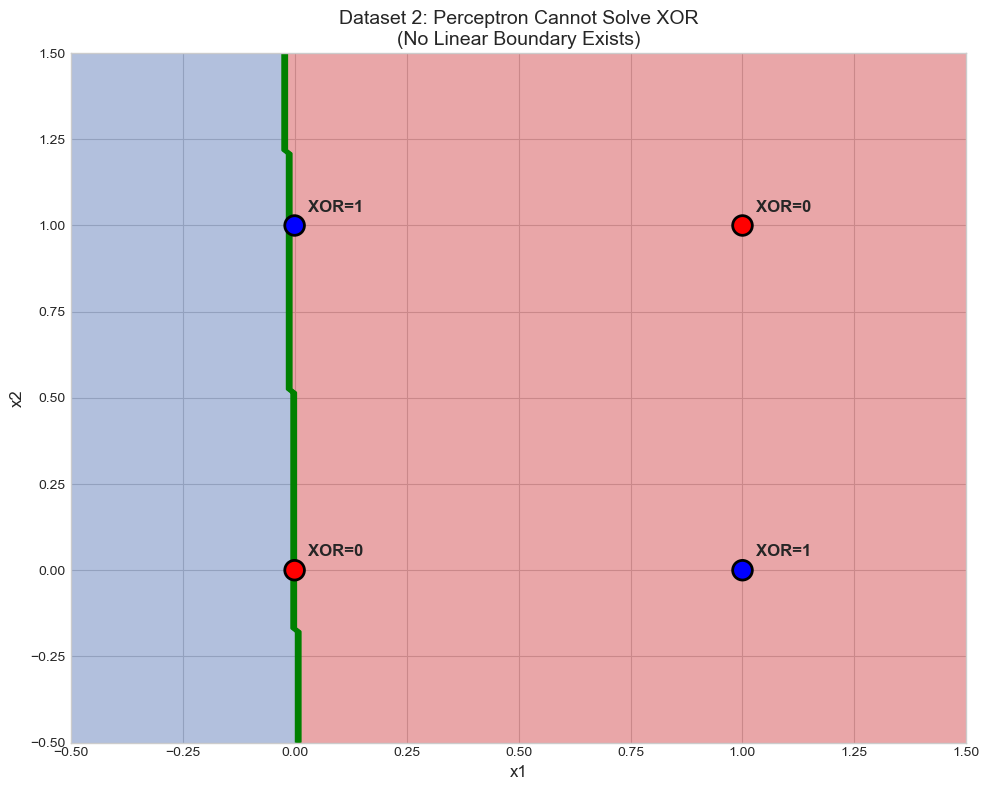

In [13]:
# Visualize the (failed) decision boundary for XOR
fig, ax = plt.subplots(figsize=(10, 8))

# Create a mesh grid for visualization
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200),
                     np.linspace(-0.5, 1.5, 200))
Z = perceptron_xor.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision regions
ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
ax.contour(xx, yy, Z, colors='green', linewidths=2)

# Plot data points
colors = ['red' if y == 0 else 'blue' for y in y_xor]
ax.scatter(X_xor[:, 0], X_xor[:, 1], c=colors, s=200, 
           edgecolors='black', linewidths=2, zorder=5)

# Add labels for each point
for i, (x, y) in enumerate(X_xor):
    ax.annotate(f'XOR={y_xor[i]}', (x, y), textcoords="offset points", 
                xytext=(10, 10), fontsize=12, fontweight='bold')

ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_title('Dataset 2: Perceptron Cannot Solve XOR\n(No Linear Boundary Exists)', 
             fontsize=14)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
plt.tight_layout()
plt.show()

### Results for Dataset 2 (XOR)

As predicted:
- The perceptron **fails to converge** (errors never reach 0)
- Accuracy is only 50-75% (cannot classify all points correctly)
- This demonstrates the **fundamental limitation** of single-layer perceptrons

**Why can't a single perceptron solve XOR?**
- XOR requires a non-linear decision boundary
- A single perceptron can only learn linear decision boundaries
- No single line can separate (0,0), (1,1) from (0,1), (1,0)

---
# Multi-Layer Perceptron (MLP) for XOR

To solve the XOR problem, we need **at least one hidden layer**. This creates a Multi-Layer Perceptron (MLP) that can learn non-linear decision boundaries.

**Architecture:**
- Input layer: 2 neurons
- Hidden layer: 2+ neurons with non-linear activation (sigmoid)
- Output layer: 1 neuron with sigmoid activation

We'll use **backpropagation** to train this network.

In [14]:
class MultiLayerPerceptron:
    """
    A simple Multi-Layer Perceptron with one hidden layer.
    Uses sigmoid activation and trains with backpropagation.
    
    Parameters:
    -----------
    hidden_size : int
        Number of neurons in the hidden layer (default: 4)
    learning_rate : float
        Learning rate for gradient descent (default: 0.5)
    n_iterations : int
        Number of training iterations (default: 10000)
    random_state : int
        Random seed for weight initialization (default: None)
    """
    
    def __init__(self, hidden_size=4, learning_rate=0.5, n_iterations=10000, 
                 random_state=None):
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.random_state = random_state
        self.W1 = None  # Weights for input -> hidden
        self.b1 = None  # Bias for hidden layer
        self.W2 = None  # Weights for hidden -> output
        self.b2 = None  # Bias for output layer
        self.loss_history = []
        
    def _sigmoid(self, x):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def _sigmoid_derivative(self, x):
        """Derivative of sigmoid function."""
        return x * (1 - x)
    
    def fit(self, X, y):
        """
        Train the MLP using backpropagation.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training data
        y : array-like, shape (n_samples,)
            Target values (0 or 1)
        
        Returns:
        --------
        self : object
        """
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)  # Ensure y is column vector
        
        # Initialize weights with Xavier initialization
        self.W1 = np.random.randn(n_features, self.hidden_size) * np.sqrt(2.0 / n_features)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, 1) * np.sqrt(2.0 / self.hidden_size)
        self.b2 = np.zeros((1, 1))
        
        self.loss_history = []
        
        for i in range(self.n_iterations):
            # Forward propagation
            # Hidden layer
            z1 = np.dot(X, self.W1) + self.b1
            a1 = self._sigmoid(z1)
            
            # Output layer
            z2 = np.dot(a1, self.W2) + self.b2
            a2 = self._sigmoid(z2)
            
            # Calculate loss (Binary Cross-Entropy)
            loss = -np.mean(y * np.log(a2 + 1e-8) + (1 - y) * np.log(1 - a2 + 1e-8))
            self.loss_history.append(loss)
            
            # Backpropagation
            # Output layer error
            d2 = a2 - y  # Derivative of BCE + sigmoid
            
            # Hidden layer error
            d1 = np.dot(d2, self.W2.T) * self._sigmoid_derivative(a1)
            
            # Update weights and biases
            self.W2 -= self.learning_rate * np.dot(a1.T, d2) / n_samples
            self.b2 -= self.learning_rate * np.mean(d2, axis=0, keepdims=True)
            self.W1 -= self.learning_rate * np.dot(X.T, d1) / n_samples
            self.b1 -= self.learning_rate * np.mean(d1, axis=0, keepdims=True)
            
            # Print progress
            if (i + 1) % 1000 == 0:
                print(f"Iteration {i + 1}/{self.n_iterations}, Loss: {loss:.6f}")
        
        return self
    
    def predict_proba(self, X):
        """Get probability predictions."""
        z1 = np.dot(X, self.W1) + self.b1
        a1 = self._sigmoid(z1)
        z2 = np.dot(a1, self.W2) + self.b2
        return self._sigmoid(z2)
    
    def predict(self, X):
        """Get class predictions (0 or 1)."""
        return (self.predict_proba(X) >= 0.5).astype(int).flatten()
    
    def accuracy(self, X, y):
        """Calculate classification accuracy."""
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

print("Multi-Layer Perceptron class defined successfully!")

Multi-Layer Perceptron class defined successfully!


In [15]:
# Train the MLP on XOR data
mlp = MultiLayerPerceptron(hidden_size=4, learning_rate=5.0, 
                           n_iterations=10000, random_state=42)
mlp.fit(X_xor, y_xor)

Iteration 1000/10000, Loss: 0.001785
Iteration 2000/10000, Loss: 0.000796
Iteration 3000/10000, Loss: 0.000505
Iteration 4000/10000, Loss: 0.000367
Iteration 5000/10000, Loss: 0.000288
Iteration 6000/10000, Loss: 0.000236
Iteration 7000/10000, Loss: 0.000199
Iteration 8000/10000, Loss: 0.000173
Iteration 9000/10000, Loss: 0.000152
Iteration 10000/10000, Loss: 0.000136


In [16]:
# Evaluate the MLP
accuracy_mlp = mlp.accuracy(X_xor, y_xor)
print(f"\nMLP Training Accuracy: {accuracy_mlp * 100:.2f}%")

# Show predictions
print("\nPredictions vs True Labels:")
predictions_mlp = mlp.predict(X_xor)
probabilities = mlp.predict_proba(X_xor).flatten()

for i in range(len(y_xor)):
    print(f"Input: {X_xor[i]}, True: {y_xor[i]}, Predicted: {predictions_mlp[i]}, "
          f"Prob: {probabilities[i]:.4f}, {'✓' if predictions_mlp[i] == y_xor[i] else '✗'}")


MLP Training Accuracy: 100.00%

Predictions vs True Labels:
Input: [0 0], True: 0, Predicted: 0, Prob: 0.0001, ✓
Input: [0 1], True: 1, Predicted: 1, Prob: 0.9999, ✓
Input: [1 0], True: 1, Predicted: 1, Prob: 0.9999, ✓
Input: [1 1], True: 0, Predicted: 0, Prob: 0.0001, ✓


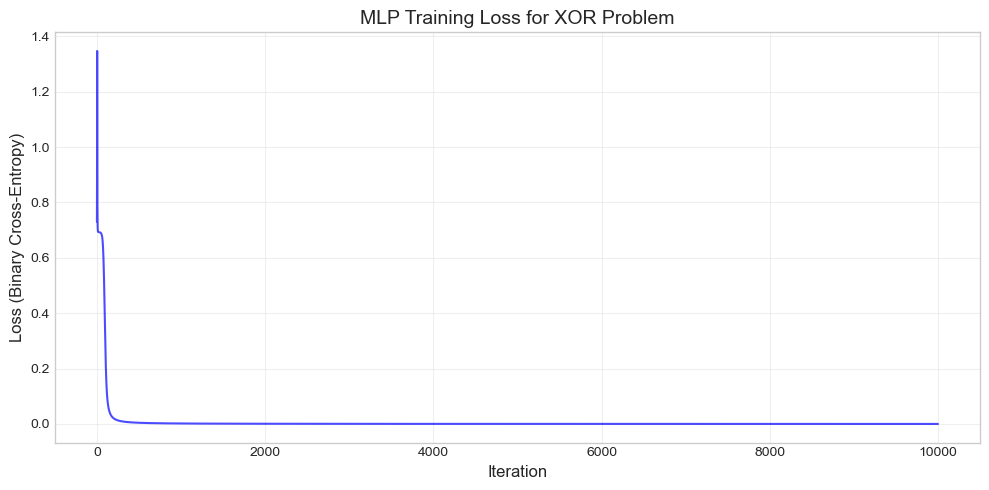

In [17]:
# Plot the training loss
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(mlp.loss_history, color='blue', alpha=0.7)
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Loss (Binary Cross-Entropy)', fontsize=12)
ax.set_title('MLP Training Loss for XOR Problem', fontsize=14)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

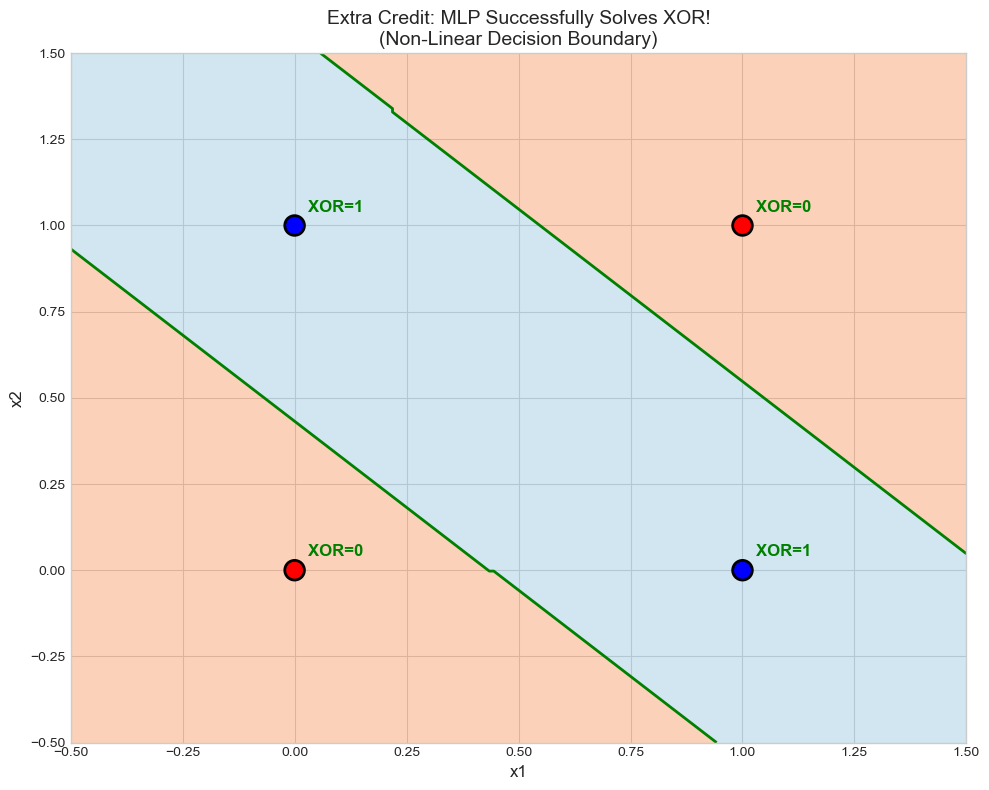

In [18]:
# Visualize the MLP decision boundary for XOR
fig, ax = plt.subplots(figsize=(10, 8))

# Create a mesh grid for visualization
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200),
                     np.linspace(-0.5, 1.5, 200))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision regions with smoother boundaries
ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu', levels=[-0.5, 0.5, 1.5])
ax.contour(xx, yy, Z, colors='green', linewidths=2, levels=[0.5])

# Plot data points
colors = ['red' if y == 0 else 'blue' for y in y_xor]
ax.scatter(X_xor[:, 0], X_xor[:, 1], c=colors, s=200, 
           edgecolors='black', linewidths=2, zorder=5)

# Add labels for each point
for i, (x, y) in enumerate(X_xor):
    pred = predictions_mlp[i]
    color = 'green' if pred == y_xor[i] else 'red'
    ax.annotate(f'XOR={y_xor[i]}', (x, y), textcoords="offset points", 
                xytext=(10, 10), fontsize=12, fontweight='bold', color=color)

ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_title('Extra Credit: MLP Successfully Solves XOR!\n(Non-Linear Decision Boundary)', 
             fontsize=14)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
plt.tight_layout()
plt.show()

### Results for MLP on XOR

The Multi-Layer Perceptron successfully solves XOR:
- **100% accuracy** on all four data points
- The loss decreases smoothly during training
- The network learns a **non-linear decision boundary**

**Key Insights:**
1. The hidden layer allows the network to create internal representations
2. Each hidden neuron can learn a different linear boundary
3. The output layer combines these to form a complex, non-linear boundary